In [1]:
%matplotlib inline

In [2]:
import sys
sys.path.append('/home/chris/Documents/code/python/cbstools-python/cbstoolsjcc-3.1.0.1-py2.7-linux-x86_64.egg')

In [3]:
from nilearn import plotting
from nilearn._utils.niimg_conversions import _index_img
import matplotlib.pyplot as plt

### Import functions

In [4]:
import volumetric_layering

### Inputs

In [5]:
lut_dir = '/home/chris/Documents/code/python/cbstools-python/ToloplogyLUT/'
data_dir = '/home/chris/Documents/projects_working/2016_Brainhack/JH_demo/'

gwb_prob = data_dir + 'adult_F04_intern_orig_binmask.nii.gz'
cgb_prob = data_dir + 'adult_F04_extern_orig_binmask.nii.gz'
intensity = data_dir + 'F04_01032013_MSME_TEsum_magn_initial.nii'
mesh = data_dir + 'adult_F04__surf_2-2.vtk'

In [6]:
coords = (-5, -2, 1)
n_layers = 5

### Simplest input: tissue classification

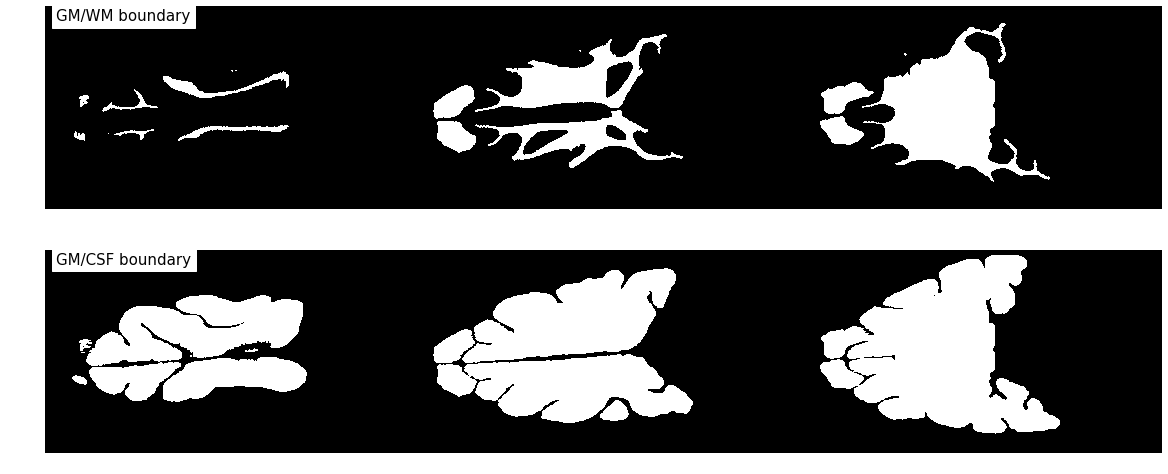

In [12]:
fig=plt.figure(figsize=(20,8));
ax1=fig.add_subplot(211)
plotting.plot_anat(gwb_prob, annotate=False, draw_cross=False, display_mode='z', cut_coords=coords, 
                   figure=fig, axes=ax1, title='GM/WM boundary')
ax2=fig.add_subplot(212)
plotting.plot_anat(cgb_prob, annotate=False, draw_cross=False, display_mode='z', cut_coords=coords, 
                   figure=fig, axes=ax2, title='GM/CSF boundary')

### Transforming to levelsets

In [13]:
gwb = volumetric_layering.create_levelsets(gwb_prob, base_name=data_dir+'gwb')

In [14]:
cgb = volumetric_layering.create_levelsets(cgb_prob, base_name=data_dir+'cgb')

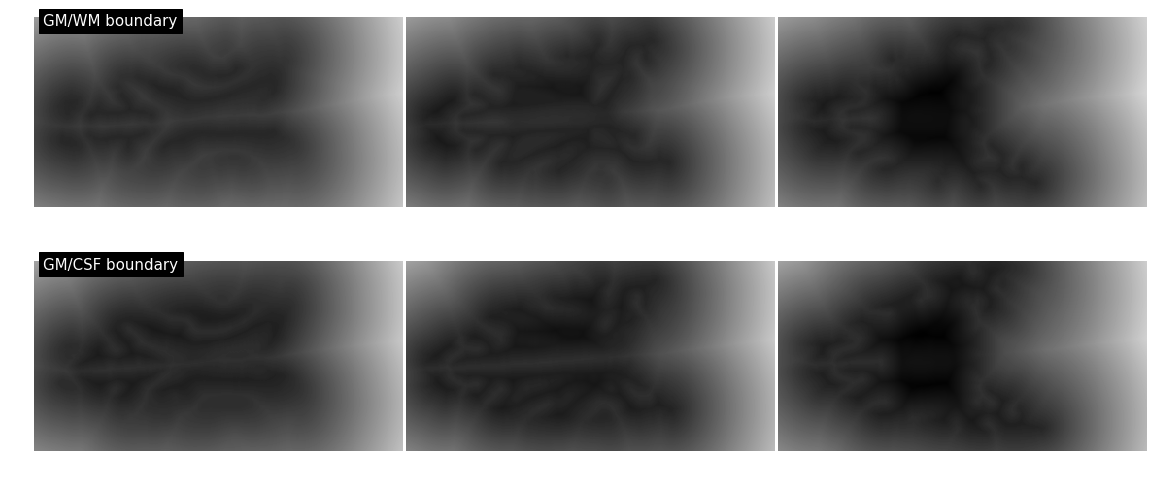

In [16]:
fig=plt.figure(figsize=(20,8));
ax1=fig.add_subplot(211)
plotting.plot_anat(gwb, annotate=False, draw_cross=False, display_mode='z', cut_coords=coords, 
                   figure=fig, axes=ax1, title='GM/WM boundary')
ax2=fig.add_subplot(212)
plotting.plot_anat(cgb, annotate=False, draw_cross=False, display_mode='z', cut_coords=coords, 
                   figure=fig, axes=ax2, title='GM/CSF boundary')

### Finding equivolumetric layers

In [17]:
depth, layers, boundaries = volumetric_layering.layering(gwb, cgb, lut_dir, n_layers=n_layers, 
                                                         base_name=data_dir+'layering')

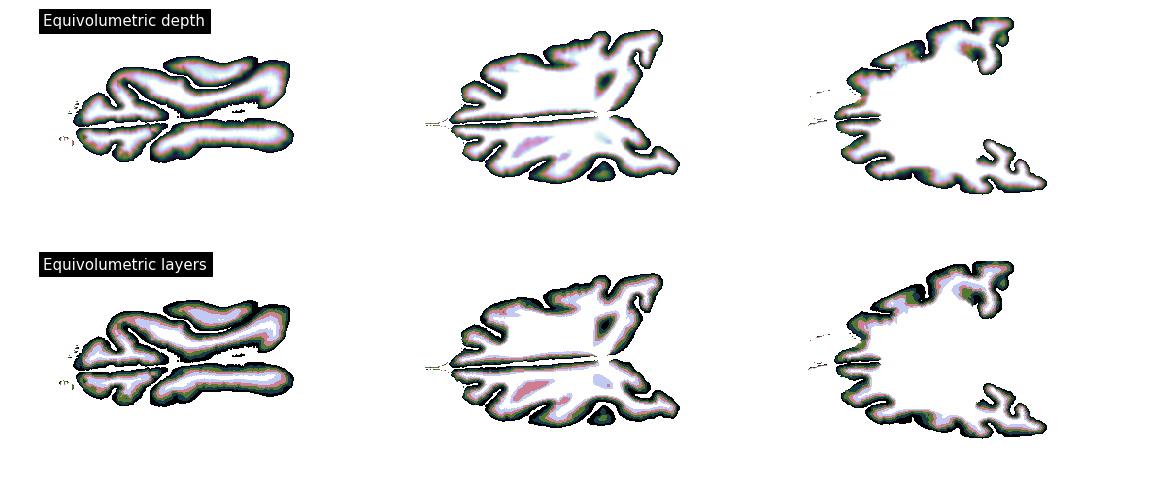

In [18]:
fig=plt.figure(figsize=(20,8));
ax1=fig.add_subplot(211)
plotting.plot_img(depth, annotate=False, draw_cross=False, display_mode='z', cut_coords=coords, 
                   figure=fig, axes=ax1, title='Equivolumetric depth', cmap='cubehelix_r')
ax2=fig.add_subplot(212)
plotting.plot_img(layers, annotate=False, draw_cross=False, display_mode='z', cut_coords=coords, 
                   figure=fig, axes=ax2, title='Equivolumetric layers', cmap='cubehelix_r', vmin=0, vmax=5)

### Sampling intensity on layers

In [19]:
profiles = volumetric_layering.profile_sampling(boundaries, intensity, base_name=data_dir+'profile_volume')

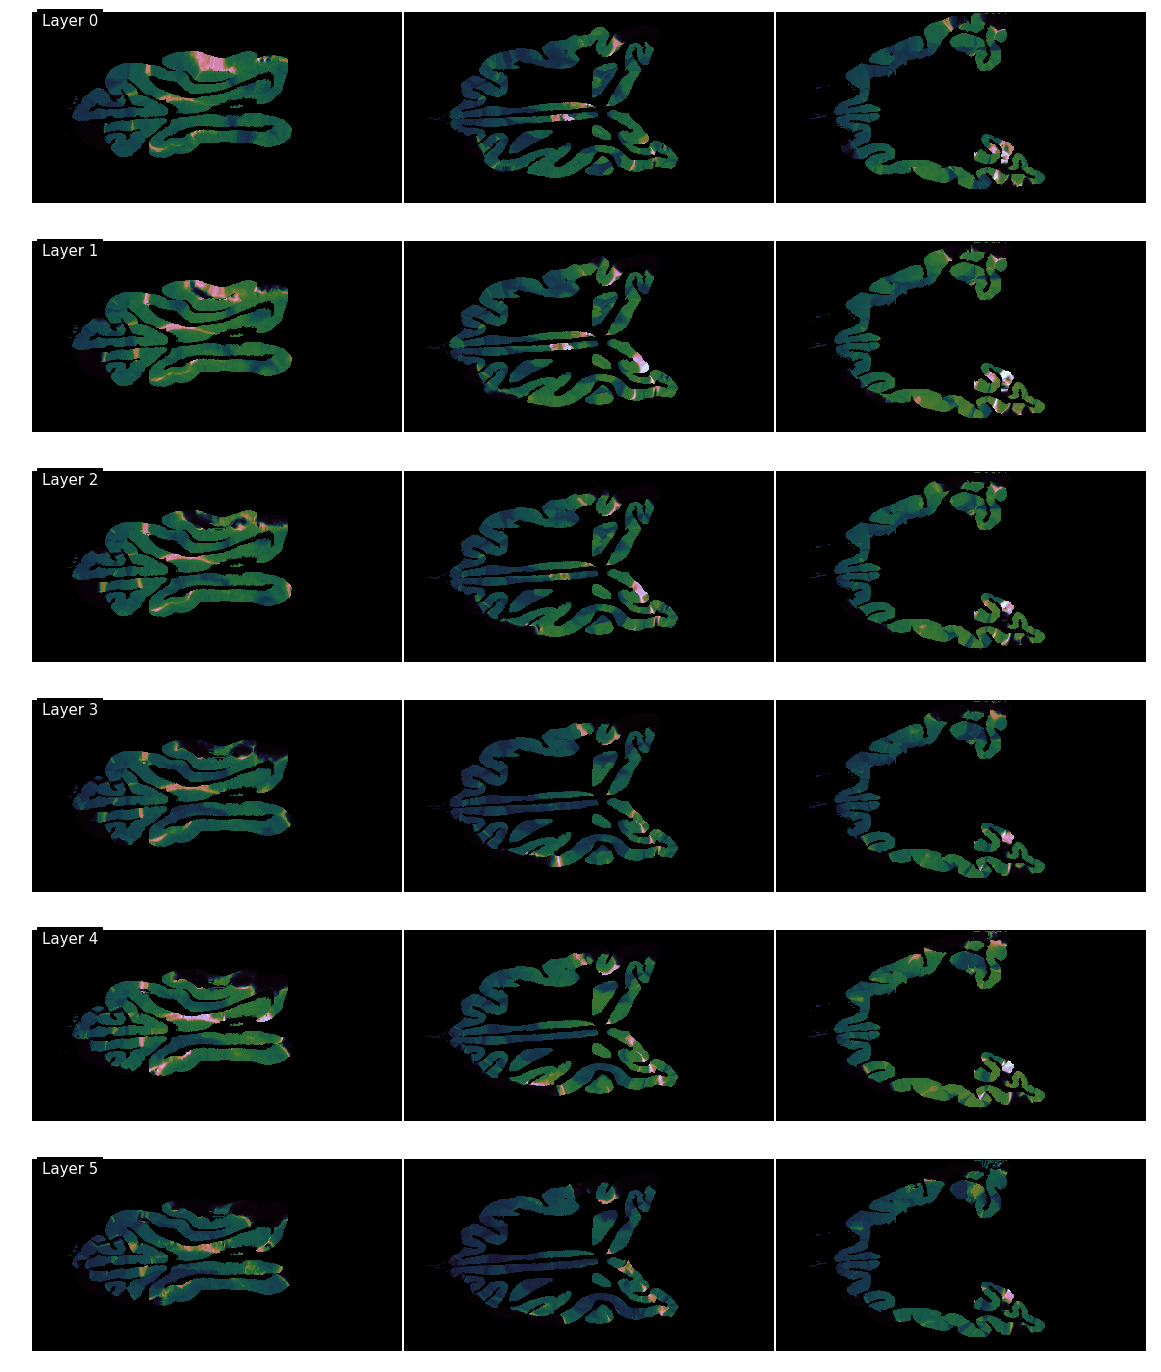

In [20]:
fig=plt.figure(figsize=(20,(n_layers+1)*4));
for i in range(n_layers+1):
    ax=fig.add_subplot(n_layers+1,1,i+1)
    plotting.plot_img(_index_img(profiles, i), annotate=False, draw_cross=False, display_mode='z', cut_coords=coords, 
                       figure=fig, axes=ax, title='Layer %s'%str(i), cmap='cubehelix', black_bg=False)

### If you are more into meshes

In [21]:
profile_meshes = volumetric_layering.profile_meshing(profiles, mesh, base_name=data_dir+'profile_meshes')

### Look at your mesh --> thanks to Anisha!

In [7]:
from nbpapaya import Surface

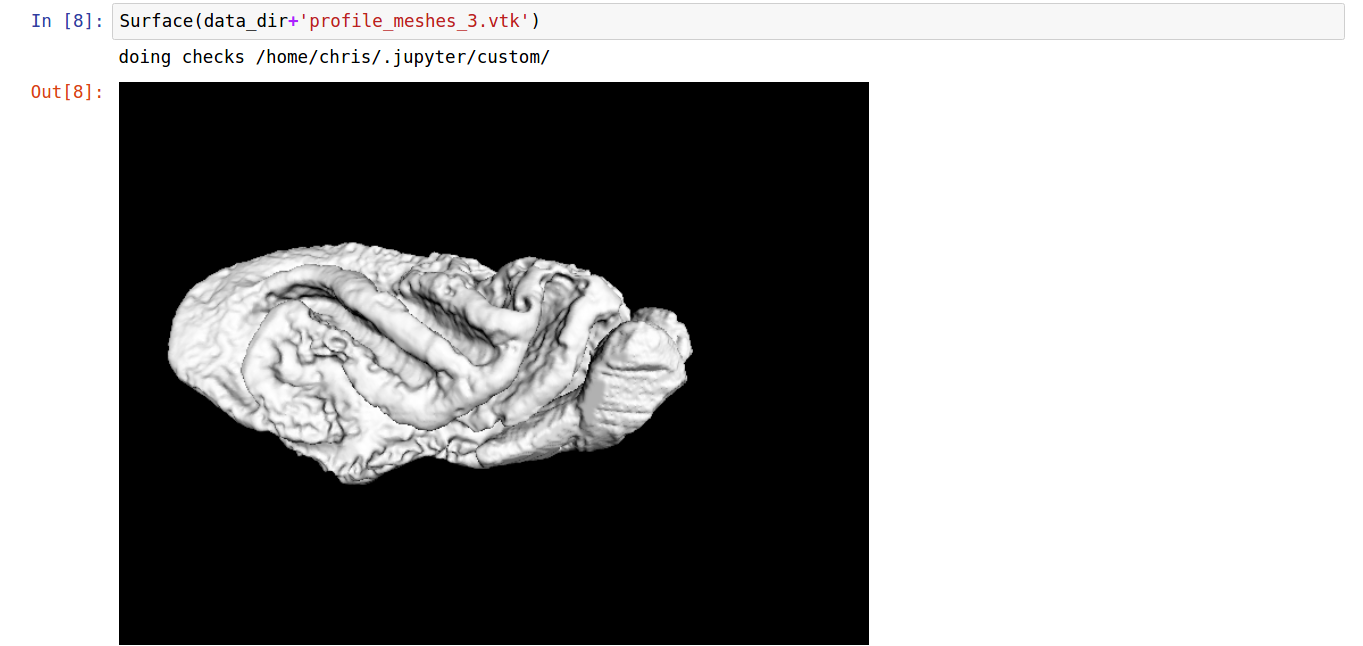

In [10]:
from IPython.display import Image
Image(filename='/home/chris/Downloads/Screenshot_2016-06-25_15-38-09.png') 

In [8]:
Surface(data_dir+'profile_meshes_3.vtk')

doing checks /home/chris/.jupyter/custom/


In [ ]:
THERE IS NOTHING BELOW HERE. PLEASE DO NOT SCROLL DOWN!

In [ ]:
TOLD YOU NOT TO SCROLLLLLLLLLLLLLLLLLLLLLLl

In [ ]:
_8._repr_html_()





akeshavan [2:38 PM]  
_8._repr_html_()

new messages
[2:38]  
that prints out something like this: '<iframe src="http://127.0.0.1:8888/files/papaya_data/tmp9yvM7c.html"\n                   width="600"\n                   height="450"\n                   scrolling="no"\n                   frameBorder="0">\n                   </iframe>'

[2:38]  
copy the iframe source and paste in a new window